# Student Performance Analysis
This project explore how family background and related factors affects academic performances aming students. The dataset includes information
on demographics, family, school and grades.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("student.csv") # Update your path when running locally

## Initial Data Overview
Check the shape, columns and a preview of the dataset.

In [6]:
print("Shape:", df.shape)

Shape: (395, 33)


In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.duplicates().sum()

## Data Exploration

Let's understand how family and demographic factors relate to final grade ('G3')

Text(0.5, 1.0, 'Family size vs Final Grade')

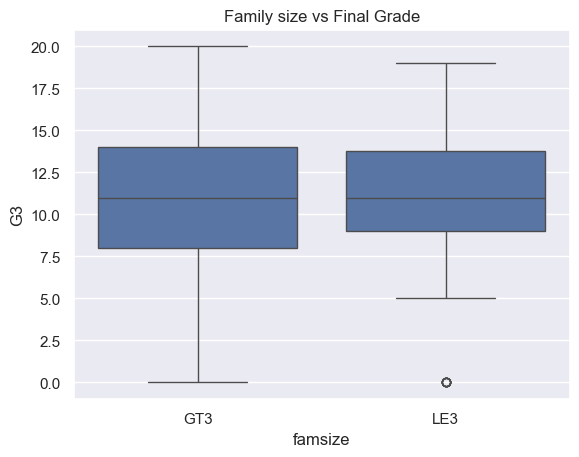

In [10]:
sns.boxplot(x = 'famsize', y = 'G3', data =df)
plt.title("Family size vs Final Grade")

In [11]:
def stacked_bar(var1, var2):
    a = pd.crosstab(df[var1], df[var2])
    f = pd.DataFrame(a)
    for i in range(len(f)):
        f.iloc[i] = f.iloc[i] / f.iloc[i].sum() * 100.00
    d = f.plot(kind = 'bar', stacked = True)
    for d in d.patches:
        plt.annotate(round(d.get_height(),1),
                     ((d.get_x() + d.get_width() / 2) * 0.96, (d.get_y() + d.get_height() / 2 )* 0.99),
                    color = 'white')

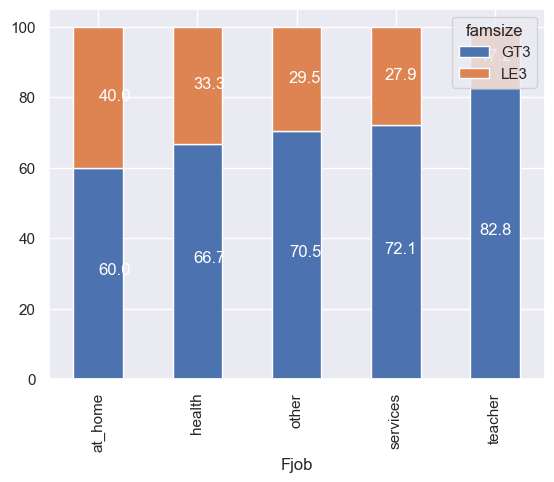

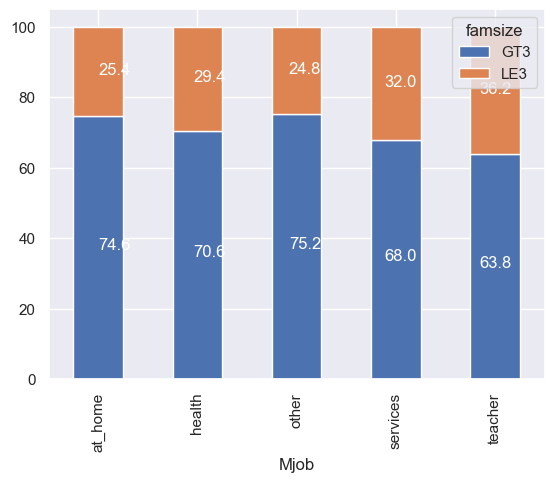

In [12]:
stacked_bar('Fjob', 'famsize')
stacked_bar("Mjob", 'famsize')

In [13]:
def heat(d1,d2):
    a=np.zeros((5,5))
    b = pd.DataFrame(a)
    list = [x  for x in df[d1].unique()]
    for i in list:
        for j in list:
            b[list.index(j)][list.index(i)] = (df[(df[d1] ==i ) &(df[d2]==j)]['G3'].mean())
    
    a = pd.DataFrame(pd.crosstab(df[d1], df[d2]))
    return sns.heatmap(a, cmap = 'coolwarm', annot=b)
    

<Axes: xlabel='Mjob', ylabel='Fjob'>

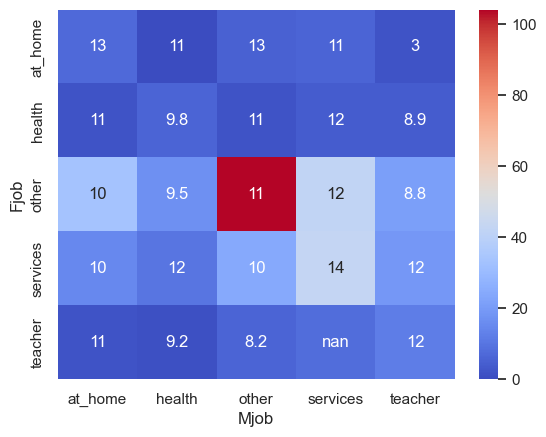

In [14]:
heat('Fjob', 'Mjob')

<Axes: xlabel='Medu', ylabel='Fedu'>

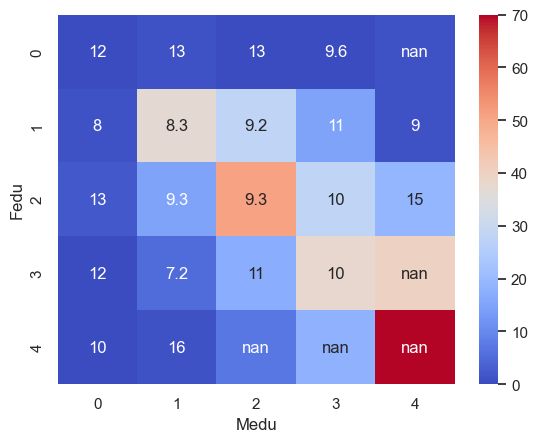

In [15]:
heat('Fedu','Medu')

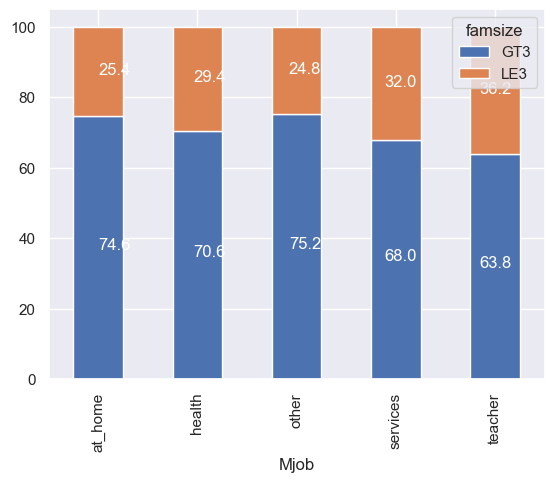

In [16]:
stacked_bar('Mjob', 'famsize')

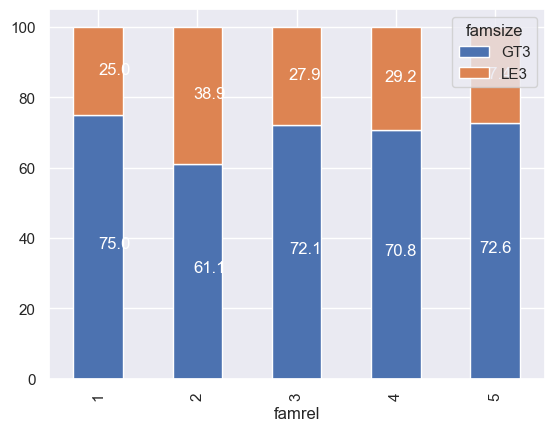

In [17]:
stacked_bar('famrel', 'famsize')

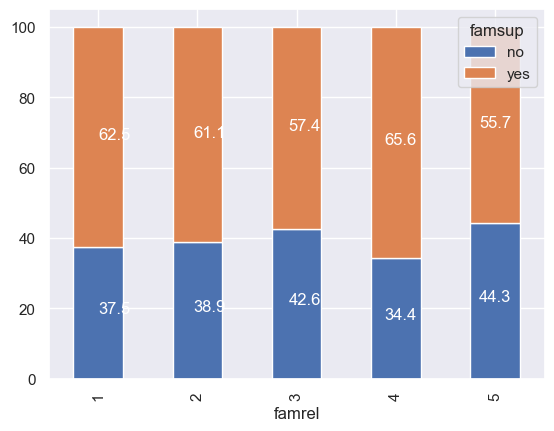

In [18]:
stacked_bar('famrel', 'famsup')

<Axes: xlabel='famrel', ylabel='Fjob'>

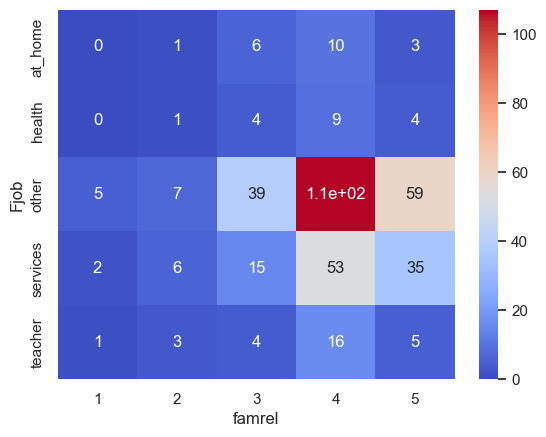

In [19]:
a = pd.DataFrame(pd.crosstab(df['Fjob'], df['famrel']))
sns.heatmap(a, cmap = 'coolwarm', annot=True)

In [20]:
df[(df['Mjob']== 'at_home') & (df['Fjob']== "at_home")]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
143,GP,F,16,U,LE3,T,1,1,at_home,at_home,...,3,4,4,3,3,1,2,14,14,13
219,GP,F,17,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,1,4,4,9,10,10
273,GP,M,17,R,GT3,T,1,2,at_home,at_home,...,3,5,2,2,2,1,2,15,14,14
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,2,2,5,18,18,19
324,GP,F,17,U,LE3,T,0,2,at_home,at_home,...,3,3,3,2,3,2,0,16,15,15
343,GP,F,17,U,GT3,A,2,2,at_home,at_home,...,3,3,1,1,2,4,0,9,8,0
363,MS,F,17,U,LE3,T,4,4,at_home,at_home,...,2,3,4,1,1,1,0,16,15,15


In [21]:
def int_plot(data, ax):
    ax.set_ylabel('Count')
    ax.set_xlabel(f" Histogram of {data}")
    ax.hist(df[data], color = 'purple')

def float_plot(data, ax):
    ax.set_ylabel('Count')
    ax.set_xlabel(f" Bar of {data}")
    ax.bar(df[data].value_counts().index,df[data].value_counts(), color= ['purple', 'magenta', 'indigo'])

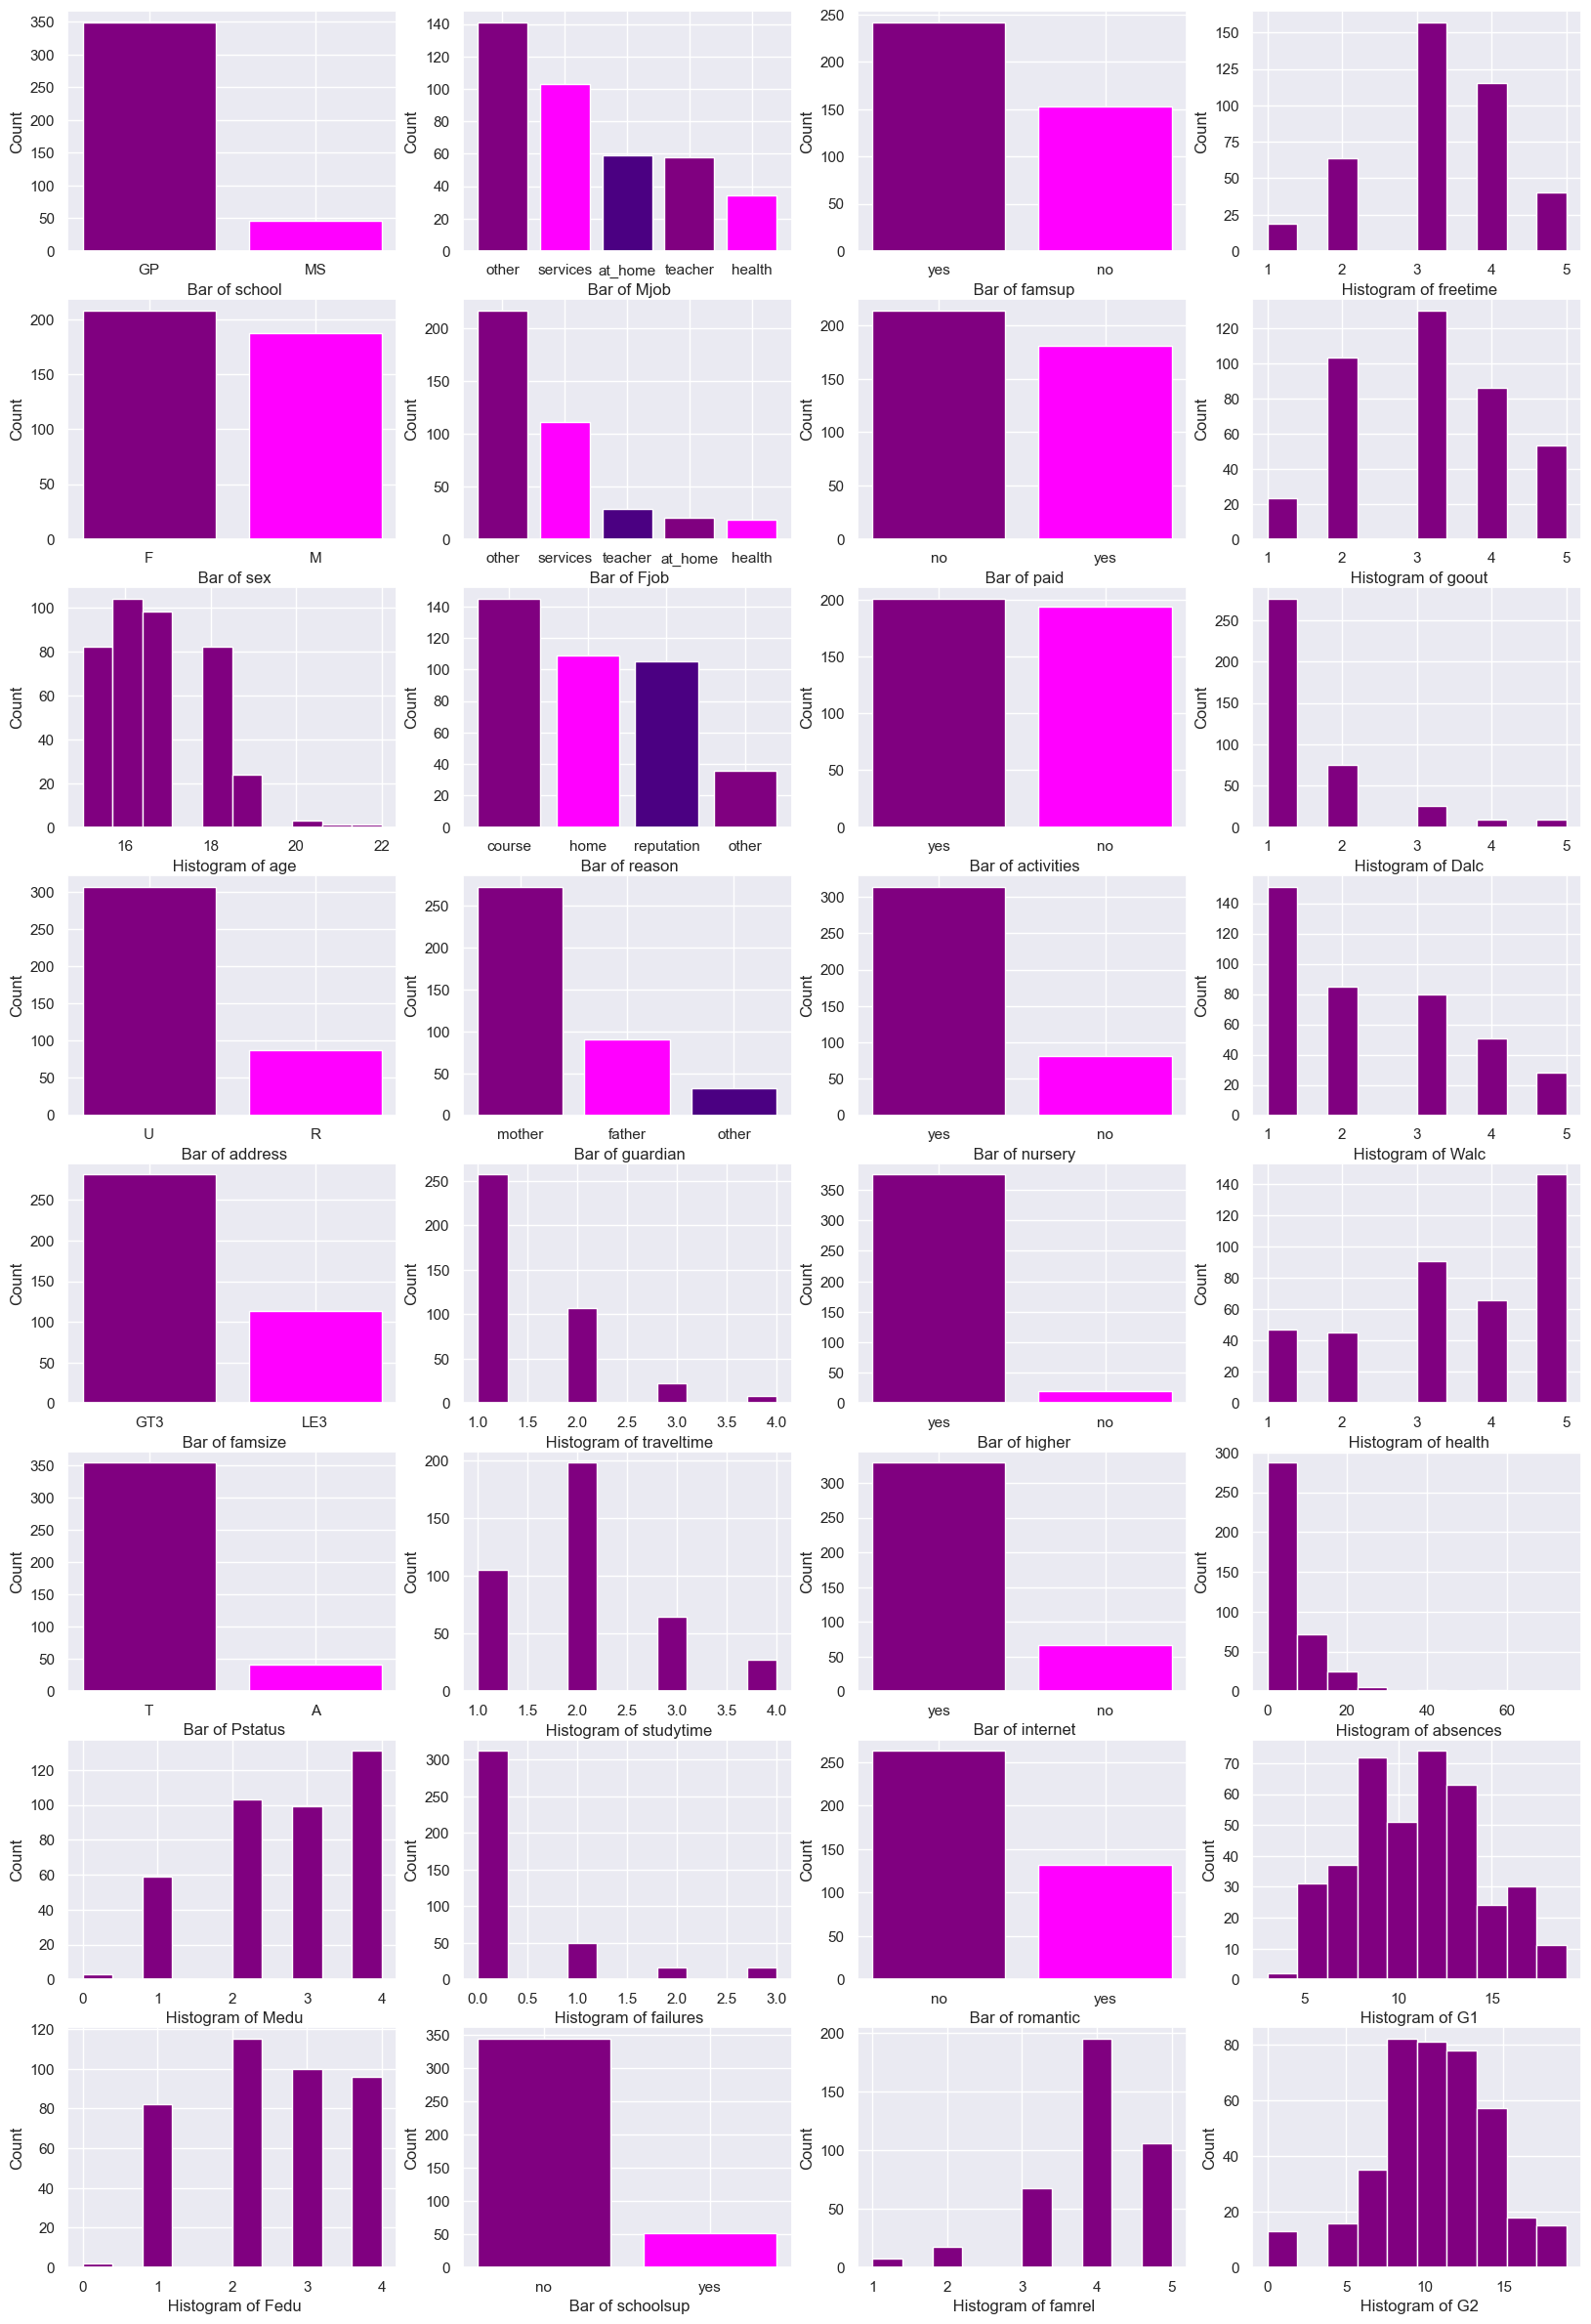

In [22]:
fig, ax = plt.subplots(nrows = int(len(df.columns[:-1])/4), ncols = 4, figsize = (20,30))
for i in df.columns[:-1]:
    l = [a for a in df.columns]
    if l.index(i) in [0,1,2,3,4,5,6,7]:
        h = 0
        b = l.index(i)
    elif l.index(i) in [8,9,10,11,12,13,14,15]:
        h = 1
        b = l.index(i) - 8
    elif l.index(i) in [16,17,18,19,20,21,22,23]:
        h=2
        b = l.index(i) - 16
    else:
        h = 3
        b = b = l.index(i) - 24
    if df[i].dtypes == "int64":
        int_plot(i, ax[b][h])
    else:
        float_plot(i, ax[b][h])

In [23]:
l =[]
for x in df.select_dtypes(exclude="object").columns:
    if df[x].max() > 10:
        l.append(x)
df[l]

,age,absences,G1,G2,G3
0,18,6,5,6,6
1,17,4,5,5,6
2,15,10,7,8,10
3,15,2,15,14,15
4,16,4,6,10,10
...,...,...,...,...,...
390,20,11,9,9,9
391,17,3,14,16,16
392,21,3,10,8,7
393,18,0,11,12,10


<Axes: >

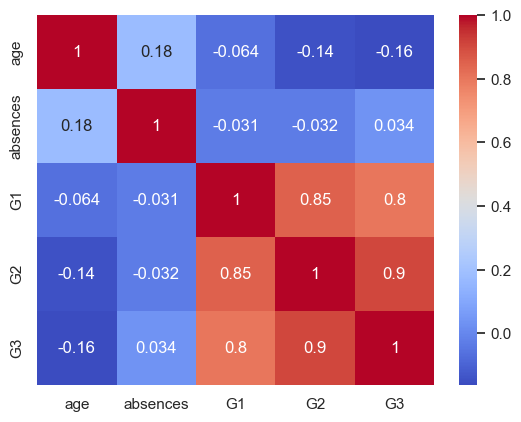

In [24]:
sns.heatmap(df[l].corr(), annot = True, cmap="coolwarm")

In [25]:
temp = []
for x in df.select_dtypes(exclude = "object").columns:
    if df[x].max() < 10:
        temp.append(x)

<Axes: >

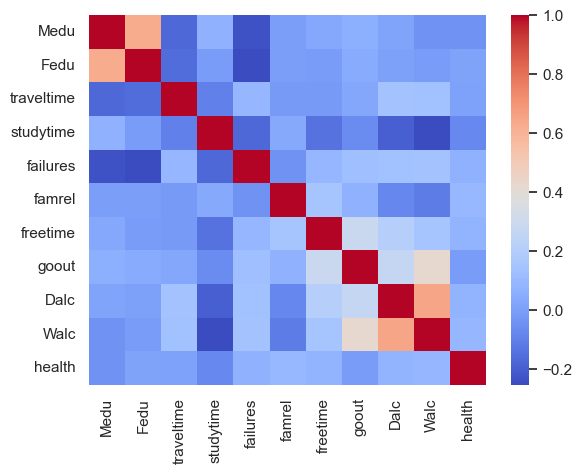

In [26]:
sns.heatmap(df[temp].corr(), annot = False, cmap = "coolwarm")

<Axes: >

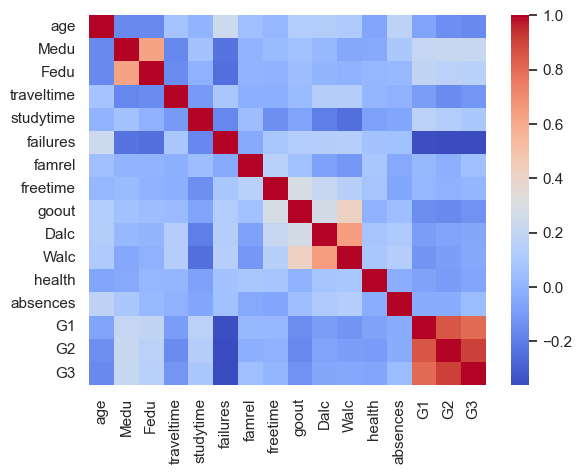

In [27]:
sns.heatmap(df.select_dtypes(exclude="object").corr(), cmap= "coolwarm")

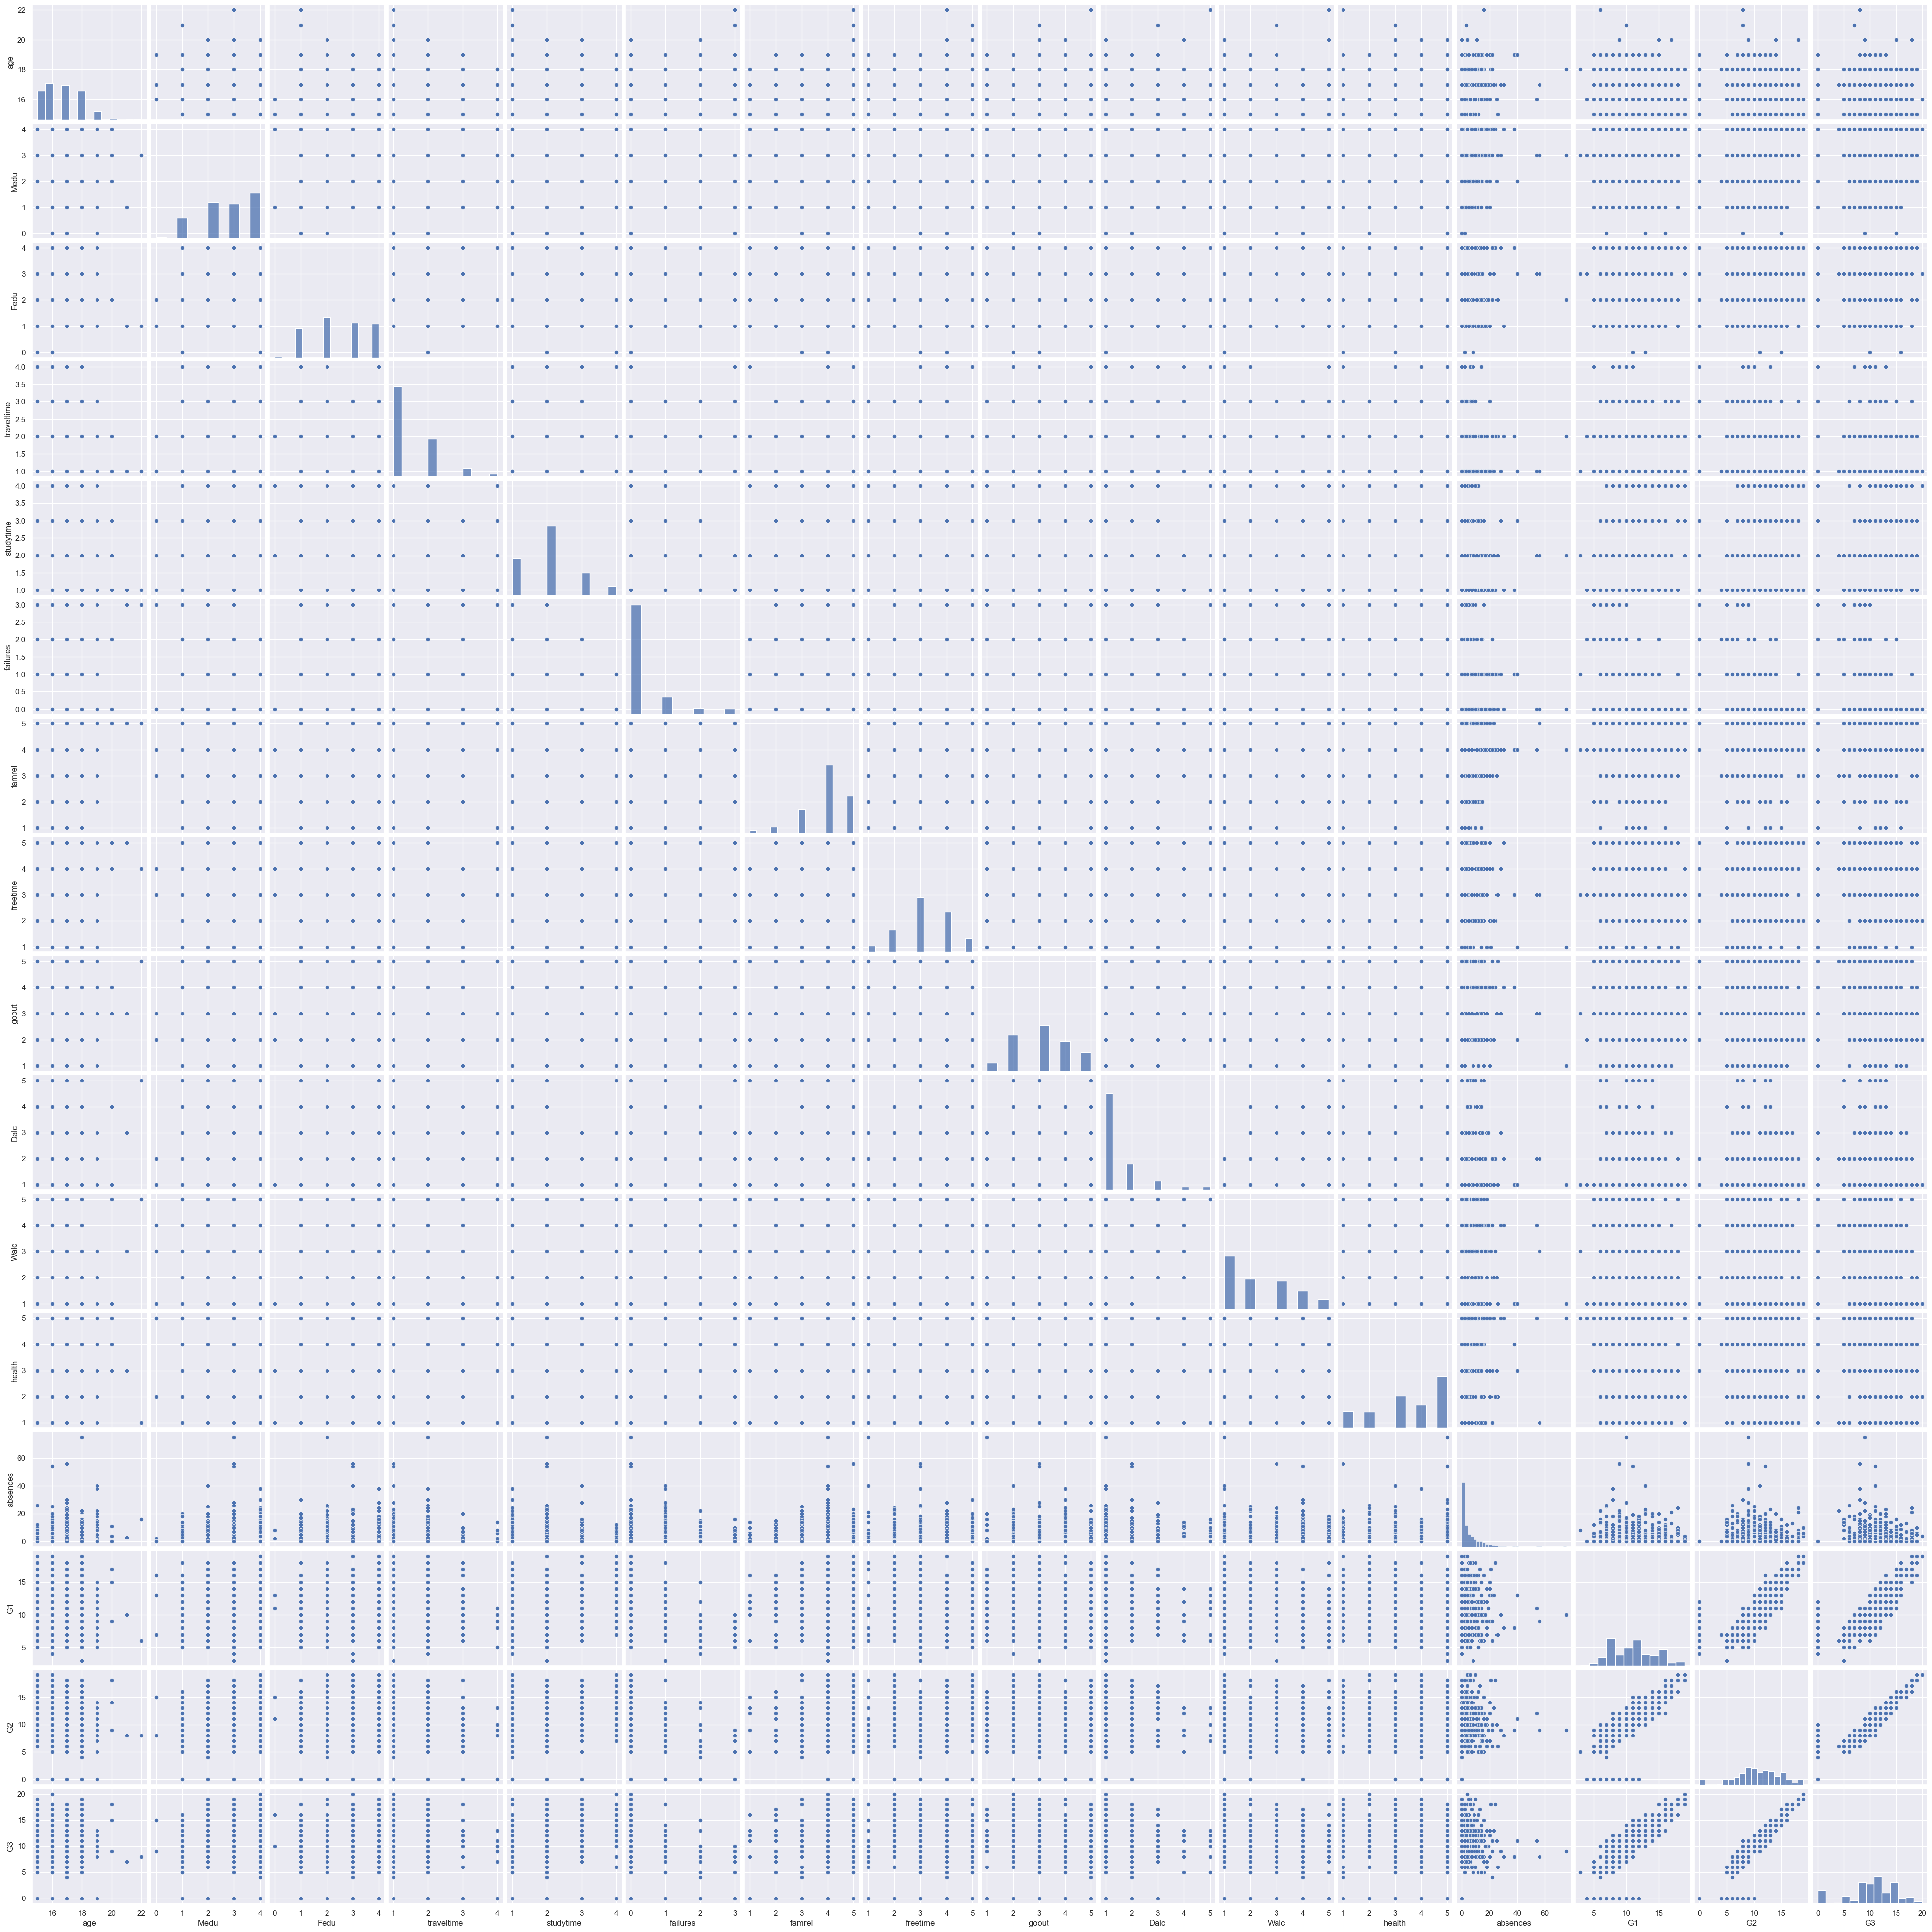

In [28]:
sns.pairplot(df.select_dtypes(exclude="object"))

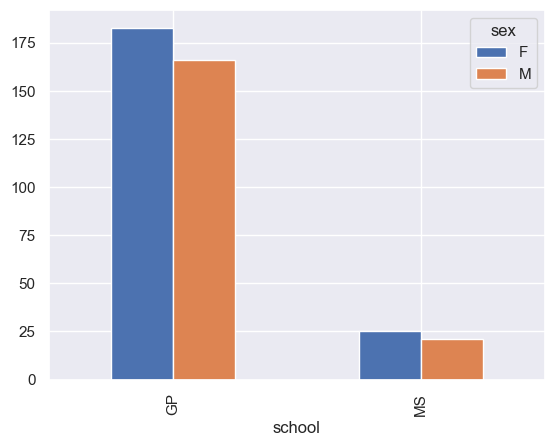

In [29]:
a = pd.crosstab(df['school'], df['sex']).plot(kind = 'bar')


In [30]:
def cplot(d1,d2, df):
    a = df.crosstab(df[d1], df[d2])
    return a

In [31]:
temp = [a for a in df.select_dtypes(include = 'object').columns]
temp

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [32]:
def crossplot(data1, data2, ax):
    a = pd.crosstab(df[data1], df[data2]).plot(kind = "bar", ax=ax)
    return a

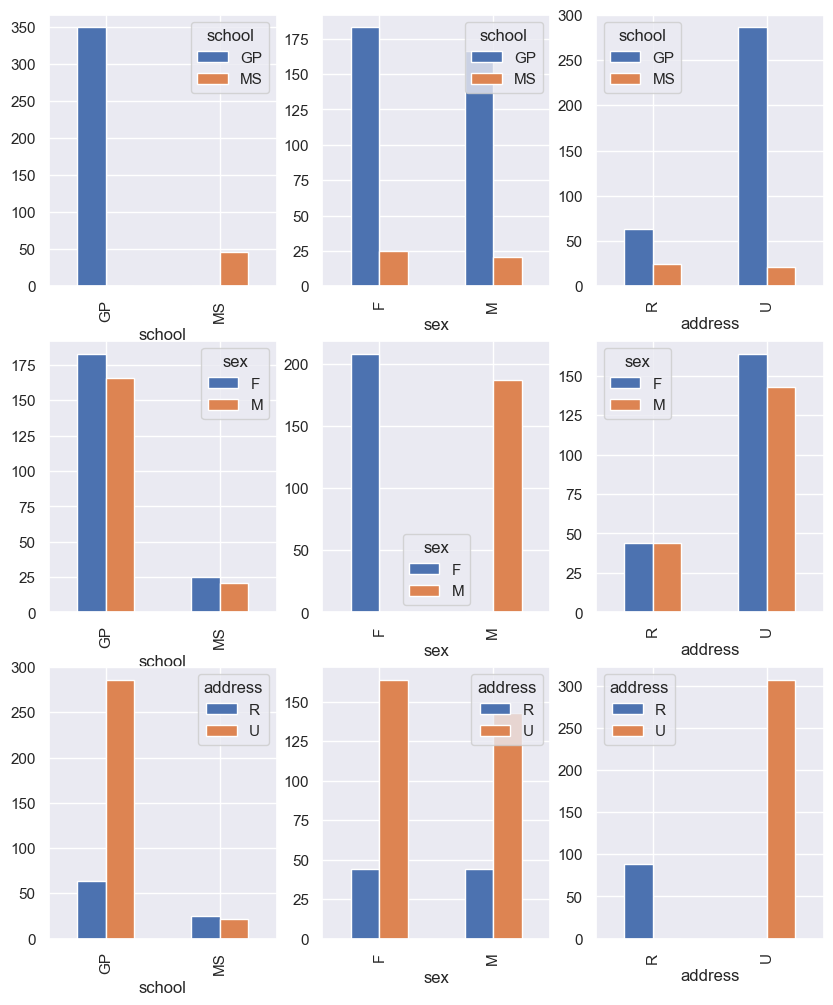

In [33]:

figs, ax = plt.subplots(nrows = len(temp[:3]), ncols = len(temp[:3]), figsize = (10,12))

for j in temp[:3]:
    for i in temp[:3]:
        crossplot(j,i, ax[temp.index(i), temp.index(j)])

## The exploratory analysis
<p> Does not show much of a good relationship between the target and other variables, so it's not ideal to build model based on this data. But for the sake of curiosity let's see how well a model can perform with these information. </p> 

In [34]:
def transformer(data, df):
    temp = [a for a in df[data].unique()]
    for a in temp:
        df[data]= df[data].replace({a :temp.index(a)})
    return df[data]

In [35]:
df2 = df.copy()

In [36]:
for a in temp:
    transformer(a,df2)

In [37]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [39]:
y = df2.pop("G3")
x = df2[['Medu', 'Fedu', 'studytime', 'failures']].copy()

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [41]:
model = LinearRegression()

In [42]:
model.fit(x_train, y_train)

LinearRegression()

In [43]:
model.score(x_test, y_test)

0.0874973248683657

In [44]:
predictions = model.predict(x_test)
print('R2 score:', r2_score(y_test,predictions))

R2 score: 0.0874973248683657
